In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning -- Clustering

Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or distance (dissimilarity) measure, such as the Euclidean distance.

<img width="60%" src='https://github.com/fordanic/cmiv-ai-course/blob/master/notebooks/figures/clustering.png?raw=1'/>

In this section we will explore a basic clustering task on some synthetic and real-world datasets.

Here are some common applications of clustering algorithms:

- Compression for data reduction
- Summarizing data as a reprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

Let's start by creating a simple, 2-dimensional, synthetic dataset:

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
X.shape

(100, 2)

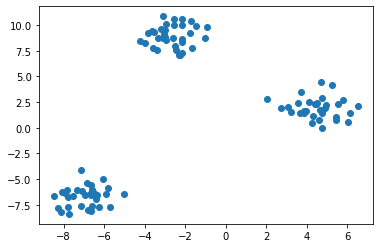

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

In the scatter plot above, we can see three separate groups of data points and we would like to recover them using clustering -- think of "discovering" the class labels that we already take for granted in a classification task.

Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space, which we can't visualize in a single histogram or scatterplot.

Now we will use one of the simplest clustering algorithms, K-means. This is an iterative algorithm which searches for three cluster centers such that the distance from each point to its cluster is minimized. The standard implementation of K-means uses the Euclidean distance, which is why we want to make sure that all our variables are measured on the same scale if we are working with real-world datastets.

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)

We can get the cluster labels either by calling fit and then accessing the ``labels_`` attribute of the K means estimator, or by calling ``fit_predict``. Either way, the result contains the ID of the cluster that each point is assigned to.

In [5]:
labels = kmeans.fit_predict(X)

In [6]:
labels

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

In [7]:
np.all(y == labels)

False

Let's visualize the assignments that have been found

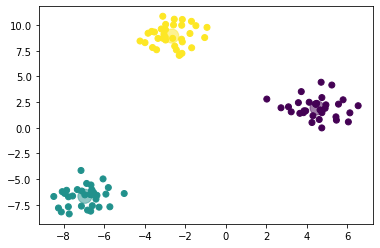

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=labels);
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c=np.unique(labels), s=200, alpha=0.5);

Compared to the true labels:

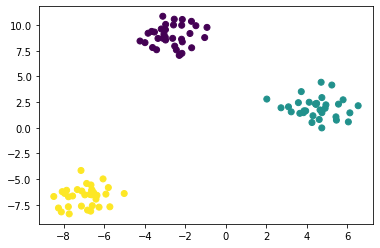

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=y);

Here, we are probably satisfied with the clustering results. But in general we might want to have a more quantitative evaluation. How about comparing our cluster labels with the ground truth we got when generating the blobs?

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Accuracy score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [11]:
np.mean(y == labels)

0.0

___
## Exercise
After looking at the "True" label array y, and the scatterplot and `labels` above, can you figure out why our computed accuracy is 0.0, not 1.0?
___

Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary, and we can not hope to recover them. Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [12]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

1.0

One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*. For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

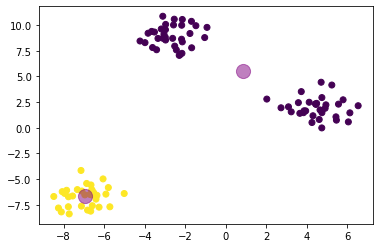

In [13]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='purple', s=200, alpha=0.5);

In [14]:
kmeans.cluster_centers_

array([[ 0.86236563,  5.48955564],
       [-6.95170962, -6.67621669]])

## Assumptions in Clustering

**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

We can easily create a dataset that has non-isotropic clusters, on which kmeans will fail:

Text(0.5, 1.0, 'Unevenly Sized Blobs')

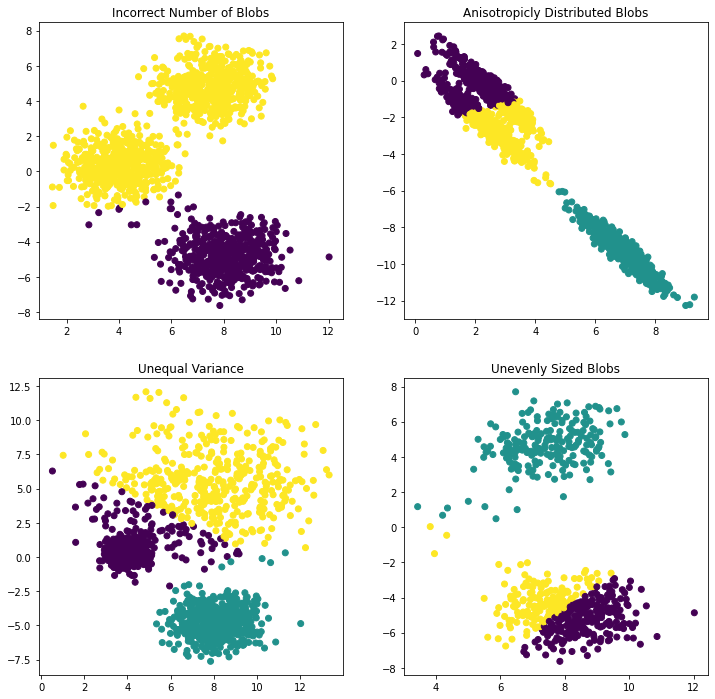

In [15]:
plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 150
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:400], X[y == 1][:200], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")


___
## Exercise
* Perform K-means clustering on the digits data, searching for ten clusters.
* Visualize the cluster centers as images (i.e. reshape each to 8x8 and use ``plt.imshow``) with the code provided.

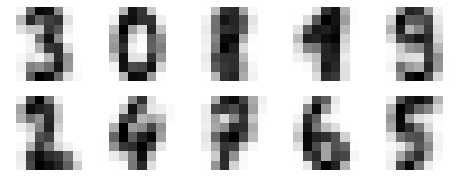

In [16]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

# load data
digits = load_digits()

# perform clustering, the data is available in digits.data

kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(digits.data)

# visualize the cluster centers
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)
    ax.axis("off")

___

## Dimensionality reduction

Remeber the two different algorithms to do dimensionality reduction:
* PCA - linear method
* t-SNE - non-linear method (can be slow if data is large)


Follow the link to play around with the visualizations: <a href="https://projector.tensorflow.org/ " target="_blank">https://projector.tensorflow.org/ </a>


<img width="60%" src='https://github.com/fordanic/cmiv-ai-course/blob/master/notebooks/figures/tsne_mnist.PNG?raw=1'/>

What to try yourself? Code available in appendix below on both PCA and t-SNE!

# Appendix

## The Elbow Method 

The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters for k-means clustering. Here, we look at the cluster dispersion for different values of k:

In [ ]:
# Create new data set with five clusters
X, y = make_blobs(n_samples=1000, centers=5, random_state=42)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y);

# Perform K-means clustering and measure the distortion to assess the fit of the clustering
distortions = []
for i in range(1, 15):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.figure()
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our visual expection of the dataset previously.

___
## Exercise
Explore the elbow method while using the make_blob function with different number of centers, for example try values between 3 and 10. Is it easy to spot the true elbow? Why or why not? 
___

## Dimensionality Reduction on Breast Cancer Dataset

### PCA
We start by loading the data.

In [ ]:
from sklearn.datasets import load_breast_cancer

# Get the data of interest
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print(X.shape)
print(y.shape)

Remember that each samples consists of 30 features, i.e. the data is 30 dimensional. However, using PCA we will reduce the number of dimensions to two.

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)
print(X_reduced.shape)
print(y.shape)

Now will plot the projected data.

In [ ]:
# Initiate a plot
fig, ax = plt.subplots(1,1,figsize=(8, 8))

# Plot labels
for name, label in [('Benign', 0), ('Malignant', 1)]:
    plt.text(X_reduced[y == label, 0].mean(),
             X_reduced[y == label, 1].mean(), name,
             bbox=dict(alpha=1.0, edgecolor='w', facecolor='w'))

# Plot projected data
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

### t-SNE
Let's do the same thing but using t-SNE. However, the computations this time will take a little bit longer.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer

# Get the data of interest
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X = TSNE(n_components=2).fit_transform(X)

# Initiate a plot
fig, ax = plt.subplots(1,1,figsize=(8, 8))

# Plot labels
for name, label in [('Benign', 0), ('Malignant', 1)]:
    plt.text(X[y == label, 0].mean(),
             X[y == label, 1].mean(), name,
             bbox=dict(alpha=1.0, edgecolor='w', facecolor='w'))

# Plot projected data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

## Dimensionality Reduction on Digits Dataset (optional)

### PCA
We start by loading the data.

In [ ]:
from sklearn import decomposition
from sklearn.datasets import load_digits

# Get the data of interest
digits = load_digits()
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

Remember that each digit consists of 8x8 pixels/features, i.e. the data is 64 dimensional. However, using PCA we will reduce the number of dimensions to two.

In [ ]:
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X = pca.transform(X)
print(X.shape)
print(y.shape)

___
### Exercise
Before plotting our 8x8 data recuded to two dimensions, briefly consider which numbers you expect seeing close to each other, i.e. which number have similar shapes?
___

Now will plot the projected data.

In [ ]:
# Initiate a plot
fig, ax = plt.subplots(1,1,figsize=(8, 8))

# Plot labels
for name, label in [('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5), ('6', 6), ('7', 7), ('8', 8), ('9', 9)]:
    plt.text(X[y == label, 0].mean(),
             X[y == label, 1].mean(), name,
             bbox=dict(alpha=1.0, edgecolor='w', facecolor='w'))

# Plot projected data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

___
### Exercise
Did the plot and the distribution of the different numbers resemble your earlier guesses?
___

### t-SNE
Let's do the same thing but using t-SNE. However, the computations this time will take a little bit longer.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

# Get the data of interest
digits = load_digits()
X = digits.data
y = digits.target

X = TSNE(n_components=2).fit_transform(X)

# Initiate a plot
fig, ax = plt.subplots(1,1,figsize=(8, 8))

# Plot labels
for name, label in [('0', 0), ('1', 1), ('2', 2), ('3', 3), ('4', 4), ('5', 5), ('6', 6), ('7', 7), ('8', 8), ('9', 9)]:
    plt.text(X[y == label, 0].mean(),
             X[y == label, 1].mean(), name,
             bbox=dict(alpha=1.0, edgecolor='w', facecolor='w'))

# Plot projected data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolor='k')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

___
## Exercises (optional)
Perform K-means clustering on the projected digits data, i.e. the data reduced to 2 dimensions. Eiter using PCA or t-SNE.
___